In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [3]:
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
df.shape

(6607, 20)

In [5]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [6]:
# Mode Imputation for Missing Values
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [7]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


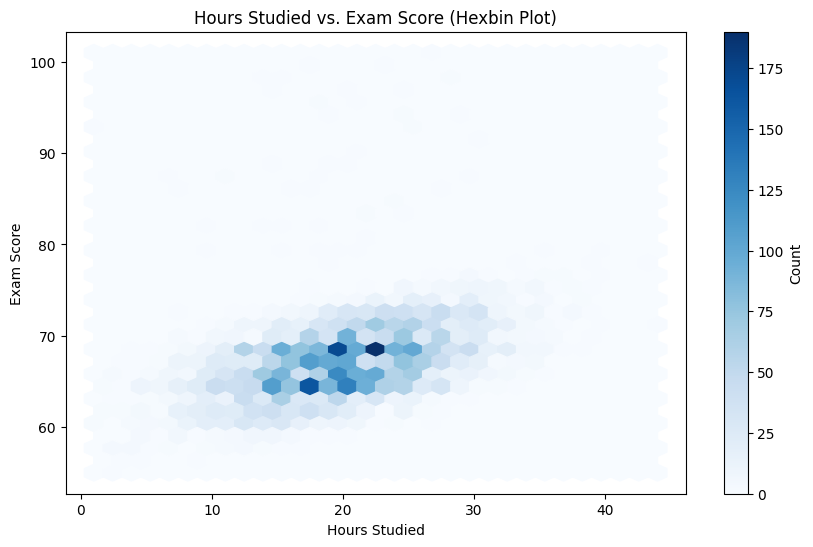

In [12]:
# Visualizing the relationship between Hours_Studied and Exam_Score
plt.figure(figsize=(10, 6))
plt.hexbin(x=df['Hours_Studied'], y=df['Exam_Score'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hours Studied vs. Exam Score (Hexbin Plot)')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()


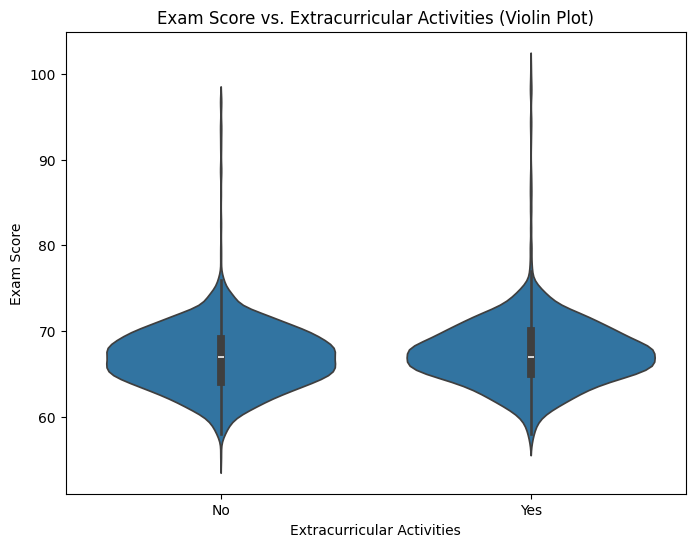

In [13]:
# Violin plot for Extracurricular Activities and Exam Score
plt.figure(figsize=(8, 6))
sns.violinplot(x='Extracurricular_Activities', y='Exam_Score', data=df)
plt.title('Exam Score vs. Extracurricular Activities (Violin Plot)')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Exam Score')
plt.show()

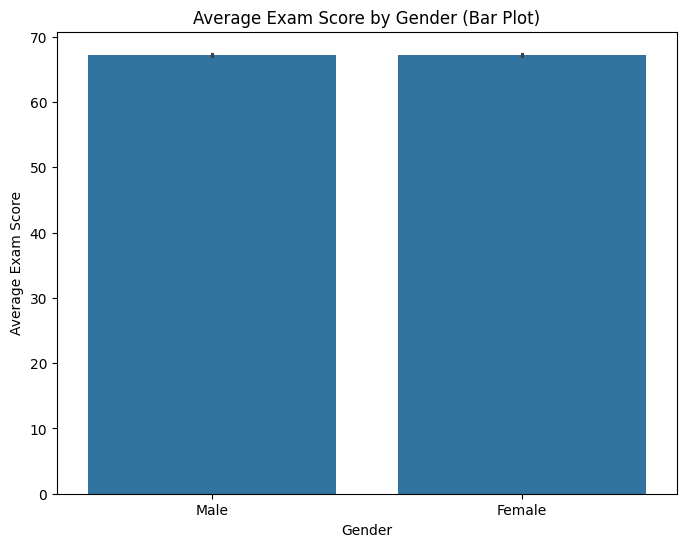

In [14]:
# Fixing the bar plot by removing the erroneous argument
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Exam_Score', data=df)
plt.title('Average Exam Score by Gender (Bar Plot)')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.show()


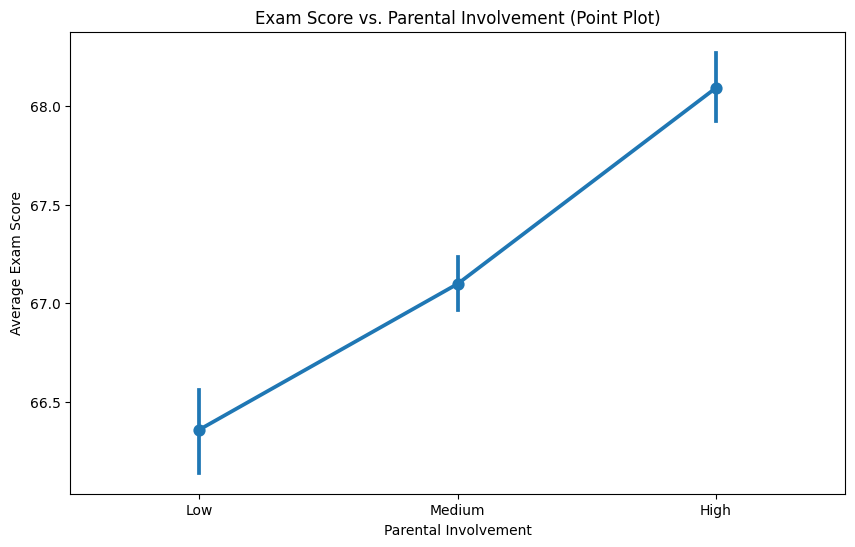

In [15]:
# Point plot for Parental Involvement and Exam Score
plt.figure(figsize=(10, 6))
sns.pointplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title('Exam Score vs. Parental Involvement (Point Plot)')
plt.xlabel('Parental Involvement')
plt.ylabel('Average Exam Score')
plt.show()


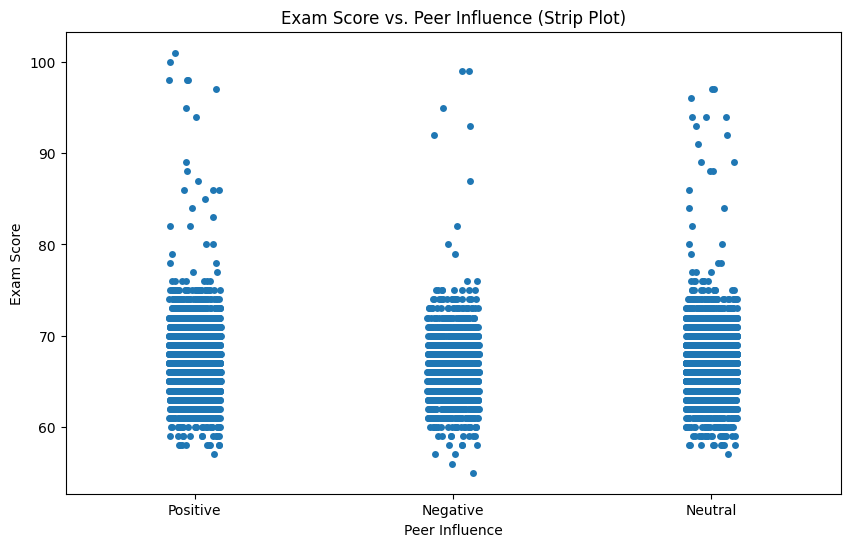

In [16]:
# Strip plot for Peer Influence and Exam Score
plt.figure(figsize=(10, 6))
sns.stripplot(x='Peer_Influence', y='Exam_Score', data=df, jitter=True)
plt.title('Exam Score vs. Peer Influence (Strip Plot)')
plt.xlabel('Peer Influence')
plt.ylabel('Exam Score')
plt.show()

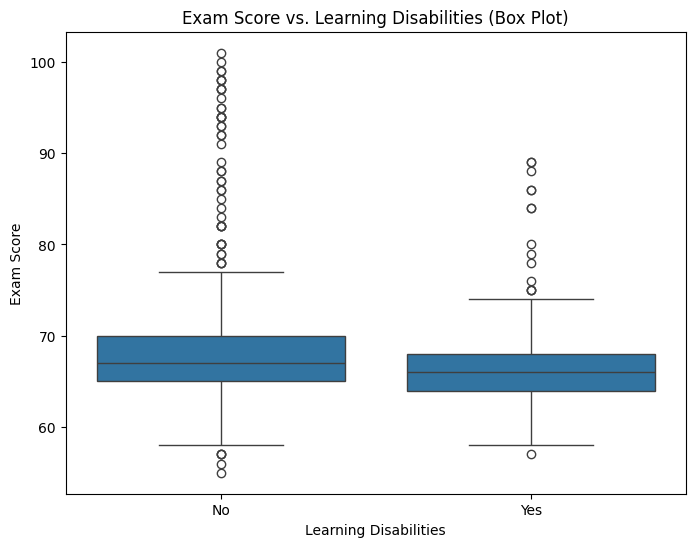

In [17]:
# Box plot for Learning Disabilities and Exam Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Learning_Disabilities', y='Exam_Score', data=df)
plt.title('Exam Score vs. Learning Disabilities (Box Plot)')
plt.xlabel('Learning Disabilities')
plt.ylabel('Exam Score')
plt.show()

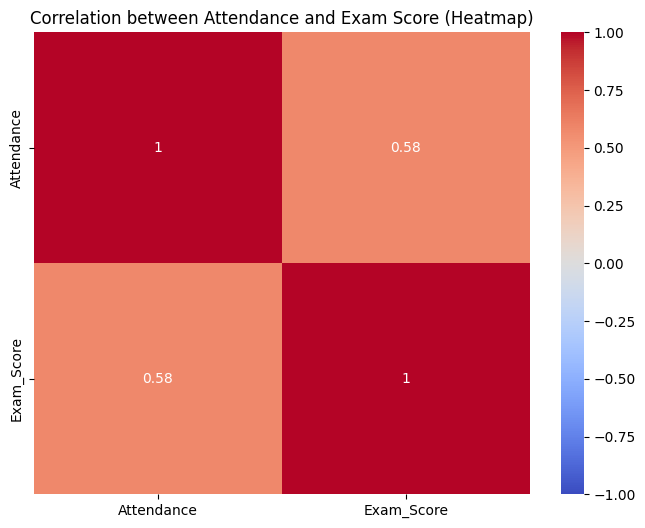

In [18]:
# Creating a heatmap for Attendance and Exam Score correlation
plt.figure(figsize=(8, 6))
correlation = df[['Attendance', 'Exam_Score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Attendance and Exam Score (Heatmap)')
plt.show()


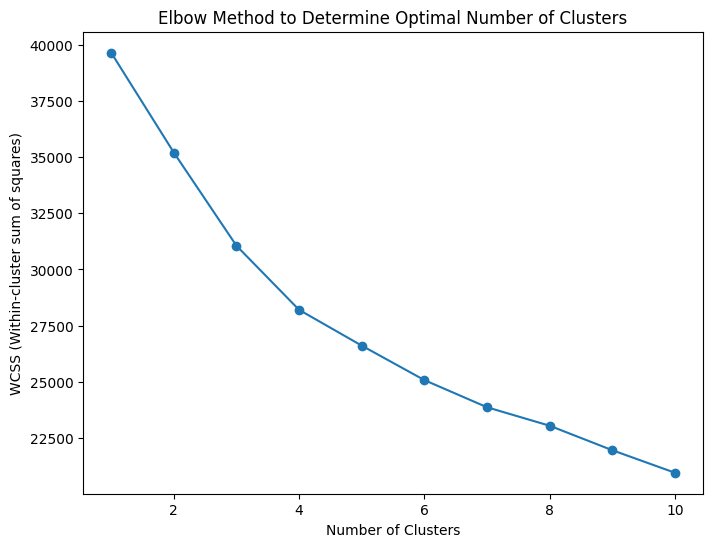

In [22]:
encoder = LabelEncoder()

# Apply the previous steps again for clustering
features_for_clustering = df[['Hours_Studied', 'Attendance', 'Previous_Scores',
                                        'Sleep_Hours', 'Parental_Involvement', 'Peer_Influence']]

features_for_clustering['Parental_Involvement'] = encoder.fit_transform(df['Parental_Involvement'])
features_for_clustering['Peer_Influence'] = encoder.fit_transform(df['Peer_Influence'])

# Normalize the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Use the Elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()


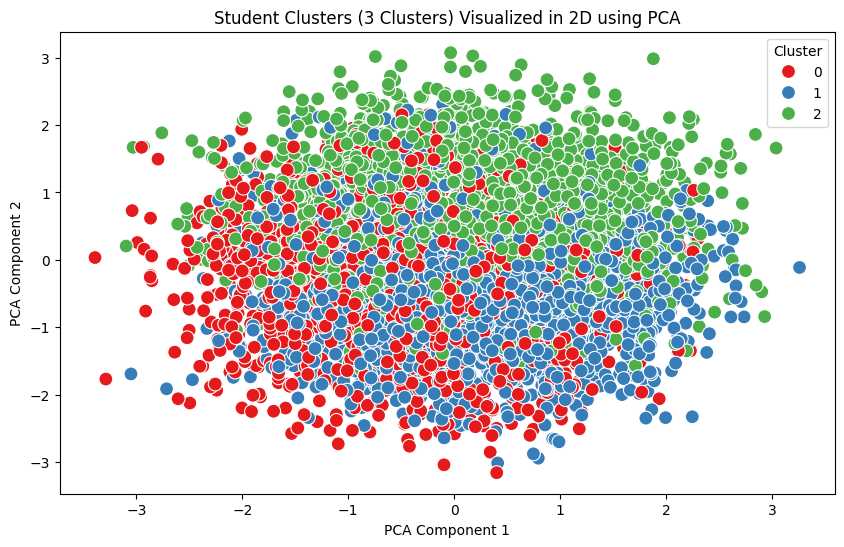

In [26]:
# Select relevant features for clustering
features_for_clustering = df[['Hours_Studied', 'Attendance', 'Previous_Scores',
                                        'Sleep_Hours', 'Parental_Involvement', 'Peer_Influence']]

# Convert categorical data to numeric using Label Encoding
encoder = LabelEncoder()
features_for_clustering['Parental_Involvement'] = encoder.fit_transform(df['Parental_Involvement'])
features_for_clustering['Peer_Influence'] = encoder.fit_transform(df['Peer_Influence'])

# Normalize the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
df['Cluster'] = clusters

# Use PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Student Clusters (3 Clusters) Visualized in 2D using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
